In [246]:
from bs4 import BeautifulSoup
import urllib.request
import requests
import re
import math
import numpy
import pandas as pd 

import json
import csv
from itertools import chain
from typing import List
from multiprocessing.dummy import Pool as ThreadPool 


In [247]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [320]:
with open('../hh-data/tables/spb/fulltime/completed.csv') as file:
    spb_fulltime_with_adresses = [row.replace('\xa0', '').split('; ') for row in file.read().split('\n')]

with open('../hh-data/tables/spb/completed.csv') as file:
    spb_with_adresses = [row.replace('\xa0', '').split('; ') for row in file.read().split('\n')]

with open('../hh-data/tables/smr/completed.csv') as file:
    smr_with_adresses = [row.replace('\xa0', '').split('; ') for row in file.read().split('\n')]
    
with open('../hh-data/tables/smr/fulltime/completed.csv') as file:
    smr_fulltime_with_adresses = [row.replace('\xa0', '').split('; ') for row in file.read().split('\n')]

with open('../hh-data/tables/kzn/completed.csv') as file:
    kzn_with_adresses = [row.replace('\xa0', '').split('; ') for row in file.read().split('\n')]
    
with open('../hh-data/tables/kzn/fulltime/completed.csv') as file:
    kzn_fulltime_with_adresses = [row.replace('\xa0', '').split('; ') for row in file.read().split('\n')]
    
with open('../hh-data/tables/spb/no-adress.csv') as file:
    spb_with_no_adresses = [row.replace('\xa0', '').split('; ') for row in file.read().split('\n')]

with open('../hh-data/tables/smr/no-adress.csv') as file:
    smr_with_no_adresses = [row.replace('\xa0', '').split('; ') for row in file.read().split('\n')]

In [321]:
spb_with_adresses_df = make_df_with_float_salary(spb_with_adresses)
spb_fulltime_with_adresses_df = make_df_with_float_salary(spb_fulltime_with_adresses)
smr_with_adresses_df = make_df_with_float_salary(smr_with_adresses)
smr_fulltime_with_adresses_df = make_df_with_float_salary(smr_fulltime_with_adresses)
kzn_with_adresses_df = make_df_with_float_salary(kzn_with_adresses)
kzn_fulltime_with_adresses_df = make_df_with_float_salary(kzn_fulltime_with_adresses)
spb_with_no_adresses_df = make_df_with_float_salary(spb_with_no_adresses)
smr_with_no_adresses_df = make_df_with_float_salary(smr_with_no_adresses)


In [322]:
def make_df_with_float_salary(data):
    for i in range(len(data) - 1):
        data[i][2] = data[i][2].replace('от ', '').replace('до ', '').replace('.', '').split(' руб ')
    with_salary = [r for r in data if len(r[2]) == 2]
    with_float_salary = pd.DataFrame([[r[0], r[1], (1 if r[2][1] == 'на руки' else 0.8) * sum([int(el) for el in r[2][0].split(' ')]) / len(r[2][0].split(' ')) / 1000] for r in with_salary])
    with_float_salary = with_float_salary.sort_values(by=[2, 1])
    return with_float_salary

In [323]:
def plot_salaries(df, n=20):
    n, bins, patches = plt.hist(list(df[2])[20:], n, density=True, facecolor='g', alpha=0.75)

    plt.xlabel('Gpm')
    plt.ylabel('Probability')
    plt.grid(True)
    plt.axis([10, 400, 0, 0.03])
    plt.rcParams["figure.figsize"] = [11, 11]
    plt.show()


In [324]:
def plot_ln_of_salaries(df, n=20):
    n, bins, patches = plt.hist([math.log(a) for a in list(df[2])[20:]], n, density=True, facecolor='g', alpha=0.75)

    plt.xlabel('Gpm')
    plt.ylabel('Probability')
    plt.grid(True)

    plt.rcParams["figure.figsize"] = [11, 11]
    plt.show()


In [325]:
len(kzn_fulltime_with_adresses_df)

1591

In [326]:
len(smr_with_adresses_df)

962

In [327]:
len(kzn_fulltime_with_adresses_df)

1591

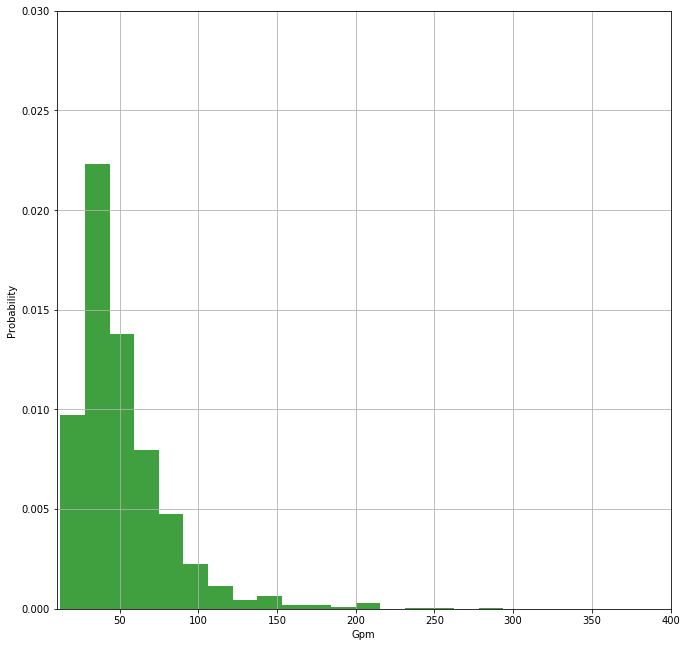

In [336]:
plot_salaries(spb_fulltime_with_adresses_df, 20)

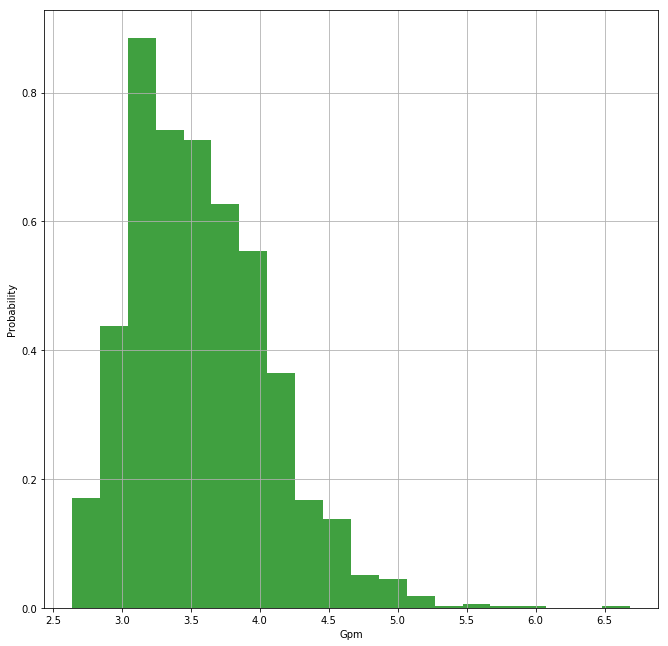

In [302]:
plot_ln_of_salaries(kzn_fulltime_with_adresses_df)